# pandas_test

This notebook is to test using the pandas library for processing the standings by date data.

In [76]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pltdate
from pathlib import Path
pd.set_option('display.precision', 3)

## Exisiting setup

Dates, team, and record (wins and loses) are in a tabular form in a spreadsheet. The first column contains the date in the format `MMM DD, YYYY`. Columns two through sixteen give the team and record with the form "`[team] ([win]-[loss]) [tie_indicator]`" with `team` being the three letter abbreviation of the team's city and the `tie_indicator` only appearing if a team or teams are tied for the same rank (1st, 2nd, etc.).

Currently, the standings data is processed by reading the spreadsheet with `openpyxl`, looping through the rows and using the `parse` library to extract the data from the formatted string. The data is then stored in a two-dimensional `list` of `dict`. 

Once the data is extracted, the win fraction of a given team at a given date is evaluated by looping through the 2-D `list`, evaluating the win fraction at each date for each team and puting the resulting data into a `pandas` `DataFrame`. Since the data set is not that large (15 columns, approx. 170 rows), converting the operations from looping and list comprehensions to operating on a DataFrame, I'm guessing, will not lead to any, if at all, efficiency gains. With the desired end result being a `DataFrame` and the spreadsheet data easily importable with the `read_excel` function, learning more of the `pandas` library to transform the spreadsheet data would make the code could stream line the code.

In [77]:
current_dir = Path.cwd()
file_path = current_dir.parent / 'standings_data' / '2017_west_standings_by_date.xls'
file_path.exists()

True

In [78]:
#df = pd.read_excel('./../standings_data/2017_west_standings_by_date.xlsx',header=None,index_col=0,parse_dates=True,names=['1st','2nd', '3rd', '4th', '5th','6th', '7th', '8th','9th', '10th', '11th', '12th', '13th', '14th', '15th'])
df = pd.read_excel(file_path,header=None,index_col=0,parse_dates=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,,,,,,,,,,,,,,
2016-10-25,POR (1-0) T1,SAS (1-0) T1,GSW (0-1) T3,UTA (0-1) T3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-26,DEN (1-0) T1,LAL (1-0) T1,MEM (1-0) T1,OKC (1-0) T1,POR (1-0) T1,SAC (1-0) T1,SAS (1-0) T1,DAL (0-1) T8,GSW (0-1) T8,HOU (0-1) T8,MIN (0-1) T8,NOP (0-1) T8,PHO (0-1) T8,UTA (0-1) T8,NaN
2016-10-27,SAS (2-0),DEN (1-0) T2,LAC (1-0) T2,LAL (1-0) T2,MEM (1-0) T2,OKC (1-0) T2,POR (1-1) T7,SAC (1-1) T7,DAL (0-1) T9,GSW (0-1) T9,HOU (0-1) T9,MIN (0-1) T9,NOP (0-1) T9,PHO (0-1) T9,UTA (0-1) T9
2016-10-28,OKC (2-0) T1,SAS (2-0) T1,DEN (1-0) T3,LAC (1-0) T3,MEM (1-0) T3,GSW (1-1) T6,HOU (1-1) T6,LAL (1-1) T6,POR (1-1) T6,SAC (1-1) T6,UTA (1-1) T6,PHO (0-2),MIN (0-1),DAL (0-2) T14,NOP (0-2) T14
2016-10-29,SAS (3-0),OKC (2-0),LAC (1-0),POR (2-1) T4,SAC (2-1) T4,DEN (1-1) T6,GSW (1-1) T6,HOU (1-1) T6,LAL (1-1) T6,MEM (1-1) T6,UTA (1-1) T6,DAL (0-2) T12,MIN (0-2) T12,PHO (0-2) T12,NOP (0-3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-08,GSW (66-14),SAS (61-19),HOU (53-26),LAC (49-31) T4,UTA (49-31) T4,OKC (45-34),MEM (43-37),POR (40-40),DEN (38-41),NOP (33-47),DAL (32-47),MIN (31-48) T12,SAC (31-48) T12,LAL (24-55),PHO (23-57)
2017-04-09,GSW (66-14),SAS (61-19),HOU (54-26),LAC (49-31) T4,UTA (49-31) T4,OKC (46-34),MEM (43-38),POR (40-40),DEN (38-42),NOP (33-47),DAL (32-48),MIN (31-49) T12,SAC (31-49) T12,LAL (25-55),PHO (24-57)
2017-04-10,GSW (66-15),SAS (61-20),HOU (54-27),LAC (50-31) T4,UTA (50-31) T4,OKC (46-34),MEM (43-38),POR (41-40),DEN (38-42),NOP (33-47),DAL (32-48),MIN (31-49) T12,SAC (31-49) T12,LAL (25-55),PHO (24-57)


In [79]:
df.index.name = None

## Extracting the data

A column of the `DataFrame` resulting from reading the spreadsheet with `read_excel` will look something like the following:

In [80]:
spam = pd.Series(['CLE (1-0)','BOS (1-0) T1', 'ATL (1-0) T1', 'CHO (2-0) T1'])
print(spam)

0       CLE (1-0)
1    BOS (1-0) T1
2    ATL (1-0) T1
3    CHO (2-0) T1
dtype: object


`Series` objects let you use regex to extract data out of strings with a defined pattern and will return a `DataFrame`. For the purposes of plotting each teams win fraction with time, the tie indicator not of any interest so the regex pattern that will extract the standings data is the following:

In [81]:
standings_pat = r'(?P<team>[A-Z]{3})\s\((?P<win>\d+)\-(?P<loss>\d+)\)'
standings_pat

'(?P<team>[A-Z]{3})\\s\\((?P<win>\\d+)\\-(?P<loss>\\d+)\\)'

Applying the regex pattern to the series to extract the data using `str.extract`. The `expand` keyword determines if the return type is a `DataFrame`, `Series`, or `Index`. If it is `False`, `extract` will return a `Series` or `Index` if there is only one capture group otherwise `extract` returns a `DataFrame`. `expand` defualts to true and since a `DataFrame` return is desired, it is best to leave `expand` as the default.

In [82]:
eggs = spam.str.extract(standings_pat)
eggs

,team,win,loss
0,CLE,1,0
1,BOS,1,0
2,ATL,1,0
3,CHO,2,0


In [83]:
type(eggs)

pandas.core.frame.DataFrame

Parameters will remain string objects and you will need to convert them to numeric data types with the `to_numeric` function

In [84]:
eggs['win']

0    1
1    1
2    1
3    2
Name: win, dtype: object

In [85]:
eggs['win'] = pd.to_numeric(eggs['win'])
eggs['loss'] = pd.to_numeric(eggs['loss'])
eggs['win']

0    1
1    1
2    1
3    2
Name: win, dtype: int64

With the win/loss data converted to numeric data, the win fraction can be easily evaluated

In [86]:
eggs['GP'] = eggs['win'] + eggs['loss']
eggs['PCT'] = eggs['win'] / eggs['GP']
eggs

,team,win,loss,GP,PCT
0,CLE,1,0,1,1.0
1,BOS,1,0,1,1.0
2,ATL,1,0,1,1.0
3,CHO,2,0,2,1.0


Since `str.extract` returns a `DataFrame`, we will need to setup a `DataFrame` with `MultiIndex` columns. To setup the `MultiIndex`, make a list of arrays with the column titles and use the `MultiIndex.from_product` function.

In [87]:
arrays = [np.array(df.columns), np.array(['team','win','loss','GP','PCT'])]

In [88]:
multi = pd.MultiIndex.from_product(arrays)

In [89]:
foo = pd.DataFrame(columns=multi,index= df.index )
foo

1                        2                       ...   14       \
           team  win loss   GP  PCT team  win loss   GP  PCT  ... team  win   
2016-10-25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2016-10-26  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2016-10-27  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2016-10-28  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2016-10-29  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2017-04-08  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2017-04-09  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2017-04-10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2017-04-11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2017-04-12  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                            15                      
           loss   GP  PCT team  win loss   GP  PCT  
2016-10-25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10-26  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10-27  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10-28  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10-29  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...         ...  ...  ...  ...  ...  ...  ...  ...  
2017-04-08  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-04-09  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-04-10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-04-11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-04-12  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[170 rows x 75 columns]

In [90]:
for column in df:
    temp = df[column].str.extract(standings_pat)
    temp['win'] = pd.to_numeric(temp['win'])
    temp['loss'] = pd.to_numeric(temp['loss'])
    temp['GP'] = temp['win'] + temp['loss']
    temp['PCT'] = temp['win'] / temp['GP']
    foo[column] = temp

In [91]:
foo

1                        2                       ...   14        \
           team win loss  GP    PCT team win loss  GP    PCT  ... team   win   
2016-10-25  POR   1    0   1    1.0  SAS   1    0   1    1.0  ...  NaN   NaN   
2016-10-26  DEN   1    0   1    1.0  LAL   1    0   1    1.0  ...  UTA   0.0   
2016-10-27  SAS   2    0   2    1.0  DEN   1    0   1    1.0  ...  PHO   0.0   
2016-10-28  OKC   2    0   2    1.0  SAS   2    0   2    1.0  ...  DAL   0.0   
2016-10-29  SAS   3    0   3    1.0  OKC   2    0   2    1.0  ...  PHO   0.0   
...         ...  ..  ...  ..    ...  ...  ..  ...  ..    ...  ...  ...   ...   
2017-04-08  GSW  66   14  80  0.825  SAS  61   19  80  0.762  ...  LAL  24.0   
2017-04-09  GSW  66   14  80  0.825  SAS  61   19  80  0.762  ...  LAL  25.0   
2017-04-10  GSW  66   15  81  0.815  SAS  61   20  81  0.753  ...  LAL  25.0   
2017-04-11  GSW  66   15  81  0.815  SAS  61   20  81  0.753  ...  LAL  26.0   
2017-04-12  GSW  67   15  82  0.817  SAS  61   21  82  0.744  ...  LAL  26.0   

                                15                           
            loss    GP    PCT team   win  loss    GP    PCT  
2016-10-25   NaN   NaN    NaN  NaN   NaN   NaN   NaN    NaN  
2016-10-26   1.0   1.0    0.0  NaN   NaN   NaN   NaN    NaN  
2016-10-27   1.0   1.0    0.0  UTA   0.0   1.0   1.0    0.0  
2016-10-28   2.0   2.0    0.0  NOP   0.0   2.0   2.0    0.0  
2016-10-29   2.0   2.0    0.0  NOP   0.0   3.0   3.0    0.0  
...          ...   ...    ...  ...   ...   ...   ...    ...  
2017-04-08  55.0  79.0  0.304  PHO  23.0  57.0  80.0  0.287  
2017-04-09  55.0  80.0  0.312  PHO  24.0  57.0  81.0  0.296  
2017-04-10  55.0  80.0  0.312  PHO  24.0  57.0  81.0  0.296  
2017-04-11  55.0  81.0  0.321  PHO  24.0  58.0  82.0  0.293  
2017-04-12  56.0  82.0  0.317  PHO  24.0  58.0  82.0  0.293  

[170 rows x 75 columns]

Getting the list of teams, ordered by final ranking, can be extracted from the `DataFrame` with the following code.

In [92]:
dates = foo.index
team_list = list(foo.loc[dates[-1],(slice(None),'team')].values)

In [93]:
team_list

['GSW',
 'SAS',
 'HOU',
 'LAC',
 'UTA',
 'OKC',
 'MEM',
 'POR',
 'DEN',
 'NOP',
 'DAL',
 'SAC',
 'MIN',
 'LAL',
 'PHO']

It seems to be difficult to filter the `DataFrame` with `MultiIndex` columns to get the standings data for an individual team. A different strategy is needed. 

Stacking the `DataFrame` from the initial import from `Excel` seems to be a better way of going about it. It will produce a `Series` object with a `MultiIndex` that could be more maleable than the `DataFrame`.

In [94]:
bar = df.stack(dropna=True)
bar

2016-10-25  1     POR (1-0) T1
            2     SAS (1-0) T1
            3     GSW (0-1) T3
            4     UTA (0-1) T3
2016-10-26  1     DEN (1-0) T1
                      ...     
2017-04-12  11     DAL (33-49)
            12     SAC (32-50)
            13     MIN (31-51)
            14     LAL (26-56)
            15     PHO (24-58)
Length: 2538, dtype: object

Setting `dropna` to `False` in the call to `stack` keeps the empty entries at the start of the season when some teams have yet to play a game. Might be better to leave it as the default `True`.

In [95]:
type(bar)

pandas.core.series.Series

In [96]:
baz = bar.str.extract(standings_pat,expand=False)
baz.index = baz.index.rename(('date','rank'))
baz


team win loss
date       rank              
2016-10-25 1     POR   1    0
           2     SAS   1    0
           3     GSW   0    1
           4     UTA   0    1
2016-10-26 1     DEN   1    0
...              ...  ..  ...
2017-04-12 11    DAL  33   49
           12    SAC  32   50
           13    MIN  31   51
           14    LAL  26   56
           15    PHO  24   58

[2538 rows x 3 columns]

In [97]:
type(baz)

pandas.core.frame.DataFrame

In [98]:
baz['win'] = pd.to_numeric(baz['win'])
baz['loss'] = pd.to_numeric(baz['loss'])
baz['GP'] = baz['win'] + baz['loss']
baz['PCT'] = baz['win'] / baz['GP']

In [99]:
baz

team  win  loss  GP    PCT
date       rank                           
2016-10-25 1     POR    1     0   1  1.000
           2     SAS    1     0   1  1.000
           3     GSW    0     1   1  0.000
           4     UTA    0     1   1  0.000
2016-10-26 1     DEN    1     0   1  1.000
...              ...  ...   ...  ..    ...
2017-04-12 11    DAL   33    49  82  0.402
           12    SAC   32    50  82  0.390
           13    MIN   31    51  82  0.378
           14    LAL   26    56  82  0.317
           15    PHO   24    58  82  0.293

[2538 rows x 5 columns]

In [100]:
baz = baz.reset_index(level=1)
baz

,rank,team,win,loss,GP,PCT
date,,,,,,
2016-10-25,1,POR,1,0,1,1.000
2016-10-25,2,SAS,1,0,1,1.000
2016-10-25,3,GSW,0,1,1,0.000
2016-10-25,4,UTA,0,1,1,0.000
2016-10-26,1,DEN,1,0,1,1.000
...,...,...,...,...,...,...
2017-04-12,11,DAL,33,49,82,0.402
2017-04-12,12,SAC,32,50,82,0.390
2017-04-12,13,MIN,31,51,82,0.378


In [101]:
baz.columns

Index(['rank', 'team', 'win', 'loss', 'GP', 'PCT'], dtype='object')

At this point, `baz` looks like it would be a good return for `get_standings_data_from_spreadsheet`. The code bellow relies on the `team_list` parameter which was retrieved from the `foo` `DataFrame`. Need to find a way to get it from the `baz` `DataFrame`.

In [102]:
end_date = baz.index[-1]
list(baz.loc[end_date,'team'])

['GSW',
 'SAS',
 'HOU',
 'LAC',
 'UTA',
 'OKC',
 'MEM',
 'POR',
 'DEN',
 'NOP',
 'DAL',
 'SAC',
 'MIN',
 'LAL',
 'PHO']

This approach for extracting the list of teams in the order of their final ranking only works if all entries are kept but it may be worth removing the entries where the team has played the same number of games.

In [103]:
df_list = [baz[baz['team'] == team] for team in team_list]

In [104]:
df_list[0]

,rank,team,win,loss,GP,PCT
date,,,,,,
2016-10-25,3,GSW,0,1,1,0.000
2016-10-26,9,GSW,0,1,1,0.000
2016-10-27,10,GSW,0,1,1,0.000
2016-10-28,6,GSW,1,1,2,0.500
2016-10-29,7,GSW,1,1,2,0.500
...,...,...,...,...,...,...
2017-04-08,1,GSW,66,14,80,0.825
2017-04-09,1,GSW,66,14,80,0.825
2017-04-10,1,GSW,66,15,81,0.815


In [105]:
df_list[0].index

DatetimeIndex(['2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28',
               '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01',
               '2016-11-02', '2016-11-03',
               ...
               '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08', '2017-04-09', '2017-04-10',
               '2017-04-11', '2017-04-12'],
              dtype='datetime64[ns]', name='date', length=170, freq=None)

In [106]:
baz[baz['team'] == 'GSW']['PCT']

date
2016-10-25    0.000
2016-10-26    0.000
2016-10-27    0.000
2016-10-28    0.500
2016-10-29    0.500
              ...  
2017-04-08    0.825
2017-04-09    0.825
2017-04-10    0.815
2017-04-11    0.815
2017-04-12    0.817
Name: PCT, Length: 170, dtype: float64

In [107]:
win_frac_data = [baz[baz['team'] == team]['PCT'] for team in team_list]

In [108]:
win_frac_data[0]

date
2016-10-25    0.000
2016-10-26    0.000
2016-10-27    0.000
2016-10-28    0.500
2016-10-29    0.500
              ...  
2017-04-08    0.825
2017-04-09    0.825
2017-04-10    0.815
2017-04-11    0.815
2017-04-12    0.817
Name: PCT, Length: 170, dtype: float64

In [109]:
win_frac_df = pd.concat(win_frac_data, axis=1, keys=team_list)
win_frac_df

,GSW,SAS,HOU,LAC,UTA,OKC,MEM,POR,DEN,NOP,DAL,SAC,MIN,LAL,PHO
date,,,,,,,,,,,,,,,
2016-10-25,0.000,1.000,NaN,NaN,0.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-26,0.000,1.000,0.000,NaN,0.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000
2016-10-27,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.500,1.000,0.000,0.000,0.500,0.000,1.000,0.000
2016-10-28,0.500,1.000,0.500,1.000,0.500,1.000,1.000,0.500,1.000,0.000,0.000,0.500,0.000,0.500,0.000
2016-10-29,0.500,1.000,0.500,1.000,0.500,1.000,0.500,0.667,0.500,0.000,0.000,0.667,0.000,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-08,0.825,0.762,0.671,0.613,0.613,0.570,0.537,0.500,0.481,0.412,0.405,0.392,0.392,0.304,0.287
2017-04-09,0.825,0.762,0.675,0.613,0.613,0.575,0.531,0.500,0.475,0.412,0.400,0.388,0.388,0.312,0.296
2017-04-10,0.815,0.753,0.667,0.617,0.617,0.575,0.531,0.506,0.475,0.412,0.400,0.388,0.388,0.312,0.296


Producing the win fraction data in this form actually seems unnecessary. See the `zoo` `DataFrame` below.

In [110]:
dates = win_frac_df.index.to_pydatetime()

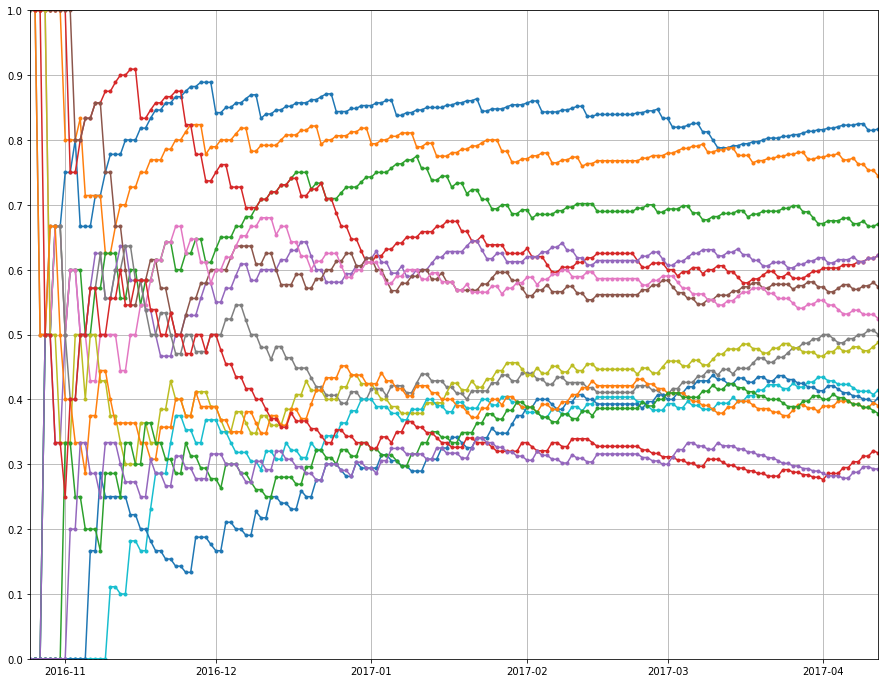

In [111]:
fig, axes = plt.subplots(figsize=[12.4,9.6])
# fig, axes = plt.subplots()
# fig, axes = plt.subplots()
axes.set_ylim(0.0, 1.0)
axes.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

start_date = win_frac_df.index[0]
end_date = win_frac_df.index[-1]
date_ticks = pd.date_range(start=start_date, end=end_date, freq=pd.DateOffset(months=1))
axes.plot(dates, win_frac_df.values, '.-')


# axes.set_xticks(date_ticks)

axes.set_xlim(start_date, end_date)
axes.grid()
# axes.legend(ncol=2)
# axes.xaxis.set_major_formatter(pltdate.AutoDateFormatter('%Y-%m-%d'))
fig.set_tight_layout(True)
# fig.autofmt_xdate()

Lots of duplicates for each team which is most noticable during the All-Star break in mid-to-late February.

In [112]:
baz

,rank,team,win,loss,GP,PCT
date,,,,,,
2016-10-25,1,POR,1,0,1,1.000
2016-10-25,2,SAS,1,0,1,1.000
2016-10-25,3,GSW,0,1,1,0.000
2016-10-25,4,UTA,0,1,1,0.000
2016-10-26,1,DEN,1,0,1,1.000
...,...,...,...,...,...,...
2017-04-12,11,DAL,33,49,82,0.402
2017-04-12,12,SAC,32,50,82,0.390
2017-04-12,13,MIN,31,51,82,0.378


In [113]:
zoo = baz.drop_duplicates(subset=['team', 'GP'])
zoo

,rank,team,win,loss,GP,PCT
date,,,,,,
2016-10-25,1,POR,1,0,1,1.000
2016-10-25,2,SAS,1,0,1,1.000
2016-10-25,3,GSW,0,1,1,0.000
2016-10-25,4,UTA,0,1,1,0.000
2016-10-26,1,DEN,1,0,1,1.000
...,...,...,...,...,...,...
2017-04-12,10,NOP,34,48,82,0.415
2017-04-12,11,DAL,33,49,82,0.402
2017-04-12,12,SAC,32,50,82,0.390


Keep date entries for each team only when there is a change in the number of games played. Filtering the `zoo` `DataFrame` for a single team now only gives 82 entries (the typical NBA season has each team playing 82 games)

In [114]:
zoo[zoo['team'] == 'SAS']

,rank,team,win,loss,GP,PCT
date,,,,,,
2016-10-25,2,SAS,1,0,1,1.000
2016-10-27,1,SAS,2,0,2,1.000
2016-10-29,1,SAS,3,0,3,1.000
2016-10-30,1,SAS,4,0,4,1.000
2016-11-01,3,SAS,4,1,5,0.800
...,...,...,...,...,...,...
2017-04-05,2,SAS,60,18,78,0.769
2017-04-07,2,SAS,61,18,79,0.772
2017-04-08,2,SAS,61,19,80,0.762


With the new cleaned `DataFrame`, is there a more elegant way to get the list of teams ordered by final standings position?

In [115]:
zoo['team'].unique()

array(['POR', 'SAS', 'GSW', 'UTA', 'DEN', 'LAL', 'MEM', 'OKC', 'SAC',
       'DAL', 'HOU', 'MIN', 'NOP', 'PHO', 'LAC'], dtype=object)

The `unique` method gets all the teams but not in the right order. The `max` and `sort_values` methods can be used to get the standings at the maximum games played sorted by rank.

In [116]:
final_standings = zoo[zoo['GP'] == zoo['GP'].max()].sort_values(by='rank')
final_standings

,rank,team,win,loss,GP,PCT
date,,,,,,
2017-04-12,1,GSW,67,15,82,0.817
2017-04-12,2,SAS,61,21,82,0.744
2017-04-12,3,HOU,55,27,82,0.671
2017-04-12,4,LAC,51,31,82,0.622
2017-04-12,5,UTA,51,31,82,0.622
2017-04-12,6,OKC,47,35,82,0.573
2017-04-12,7,MEM,43,39,82,0.524
2017-04-12,8,POR,41,41,82,0.500
2017-04-12,9,DEN,40,42,82,0.488


In [117]:
team_list = list(final_standings['team'])
team_list

['GSW',
 'SAS',
 'HOU',
 'LAC',
 'UTA',
 'OKC',
 'MEM',
 'POR',
 'DEN',
 'NOP',
 'DAL',
 'SAC',
 'MIN',
 'LAL',
 'PHO']

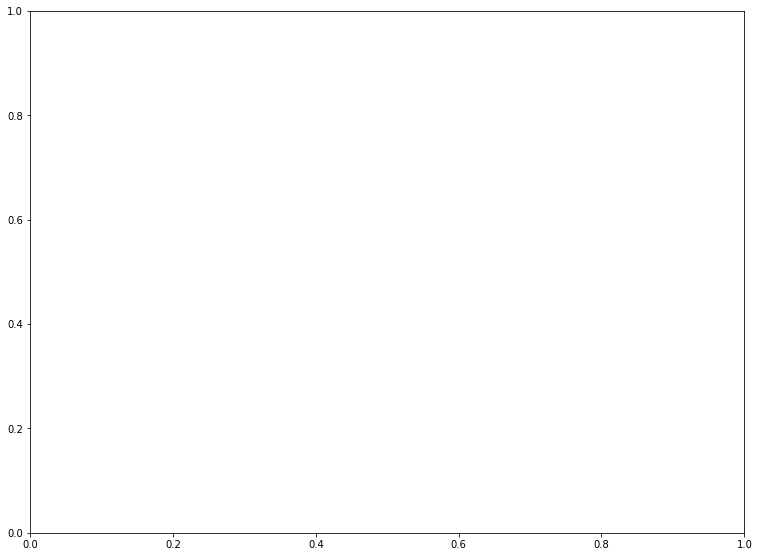

In [118]:
fig, ax = plt.subplots(figsize=(12.8, 9.6))

With the trimed data frame, you could plot the win fraction of teams at the count of games played.

In [119]:
for team in team_list:
    standings_data = zoo[zoo['team'] == team] 
    ax.plot('GP', 'PCT', data=standings_data, label=team, marker='.')

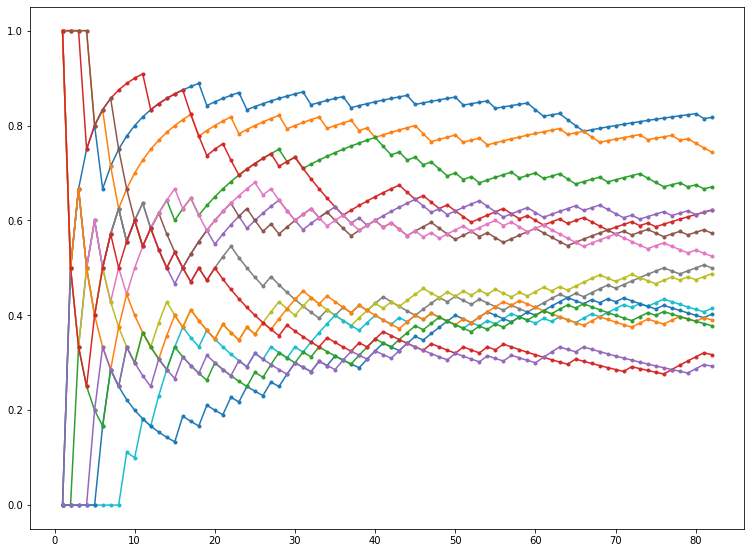

In [120]:
fig

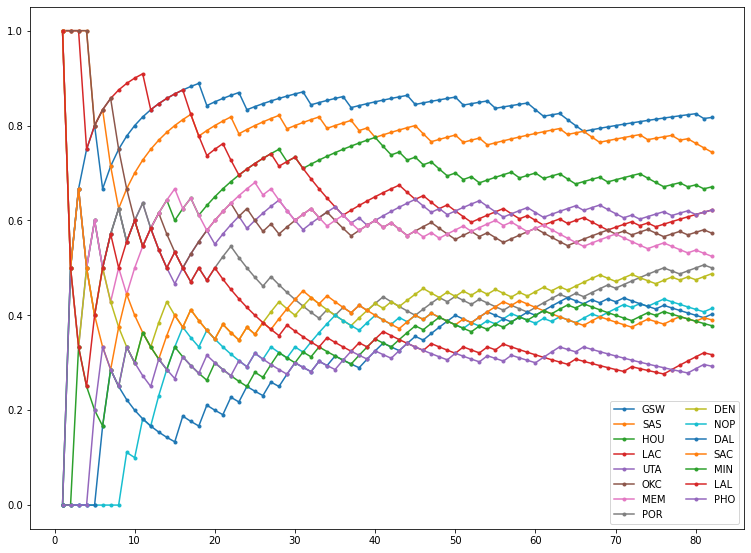

In [121]:
ax.legend(ncol=2)
fig

What would the standings look like if the teams played 58 games? Let's add a vertical line at `GP = 58`

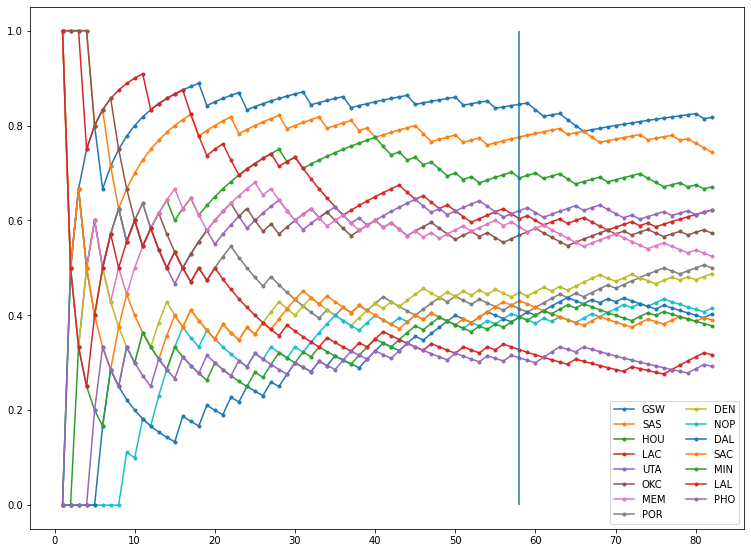

In [122]:
ax.vlines(58, 0, 1)
fig

In [123]:
zoo.index

DatetimeIndex(['2016-10-25', '2016-10-25', '2016-10-25', '2016-10-25',
               '2016-10-26', '2016-10-26', '2016-10-26', '2016-10-26',
               '2016-10-26', '2016-10-26',
               ...
               '2017-04-12', '2017-04-12', '2017-04-12', '2017-04-12',
               '2017-04-12', '2017-04-12', '2017-04-12', '2017-04-12',
               '2017-04-12', '2017-04-12'],
              dtype='datetime64[ns]', name='date', length=1230, freq=None)

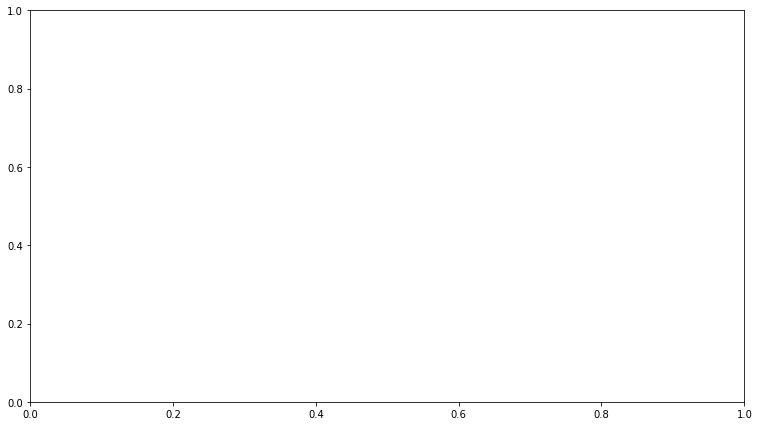

In [124]:
fig2, ax2 = plt.subplots(figsize=(12.8, 7.2))

In [125]:
for team in team_list:
    standings_data = zoo[zoo['team'] == team] 
    ax2.plot(standings_data.index, standings_data['PCT'], label=team, marker='.')

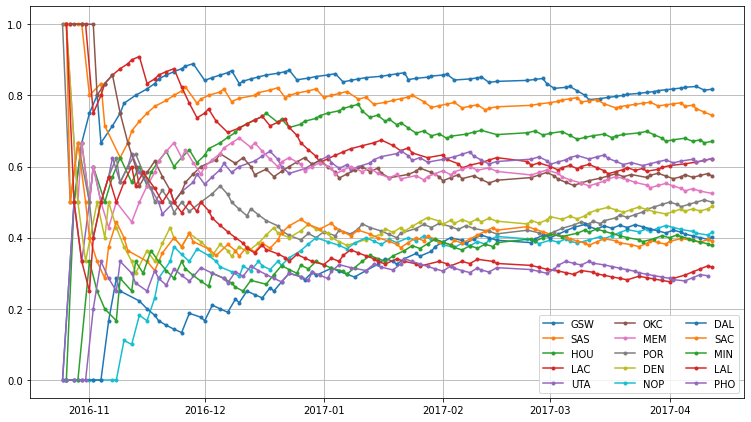

In [126]:
ax2.legend(ncol=3)
ax2.grid()
fig2

Removing the duplicate data has made the lines are more janky due to the variability of days between games. Plotting the win fraction versus the number of games played is definitely cleaner. Perhaps it should be optional whether to plot versus the date or the games played.

In [127]:
baz

,rank,team,win,loss,GP,PCT
date,,,,,,
2016-10-25,1,POR,1,0,1,1.000
2016-10-25,2,SAS,1,0,1,1.000
2016-10-25,3,GSW,0,1,1,0.000
2016-10-25,4,UTA,0,1,1,0.000
2016-10-26,1,DEN,1,0,1,1.000
...,...,...,...,...,...,...
2017-04-12,11,DAL,33,49,82,0.402
2017-04-12,12,SAC,32,50,82,0.390
2017-04-12,13,MIN,31,51,82,0.378


In [128]:
zoo

,rank,team,win,loss,GP,PCT
date,,,,,,
2016-10-25,1,POR,1,0,1,1.000
2016-10-25,2,SAS,1,0,1,1.000
2016-10-25,3,GSW,0,1,1,0.000
2016-10-25,4,UTA,0,1,1,0.000
2016-10-26,1,DEN,1,0,1,1.000
...,...,...,...,...,...,...
2017-04-12,10,NOP,34,48,82,0.415
2017-04-12,11,DAL,33,49,82,0.402
2017-04-12,12,SAC,32,50,82,0.390


In [129]:
baz.loc[(baz['team'] == 'SAS') & (baz['GP'] == 40)]

,rank,team,win,loss,GP,PCT
date,,,,,,
2017-01-14,2,SAS,31,9,40,0.775
2017-01-15,2,SAS,31,9,40,0.775
2017-01-16,2,SAS,31,9,40,0.775


In [130]:
zoo.loc[(zoo['team'] == 'SAS') & (zoo['GP'] == 40)]

,rank,team,win,loss,GP,PCT
date,,,,,,
2017-01-14,2,SAS,31,9,40,0.775


In [131]:
zoo['team']

date
2016-10-25    POR
2016-10-25    SAS
2016-10-25    GSW
2016-10-25    UTA
2016-10-26    DEN
             ... 
2017-04-12    NOP
2017-04-12    DAL
2017-04-12    SAC
2017-04-12    MIN
2017-04-12    LAL
Name: team, Length: 1230, dtype: object

In [132]:
print(zoo.index.name)

date


In [133]:
zoo.index.name = 'date'

In [134]:
print(zoo.index.name)

date


In [135]:
final_standings

,rank,team,win,loss,GP,PCT
date,,,,,,
2017-04-12,1,GSW,67,15,82,0.817
2017-04-12,2,SAS,61,21,82,0.744
2017-04-12,3,HOU,55,27,82,0.671
2017-04-12,4,LAC,51,31,82,0.622
2017-04-12,5,UTA,51,31,82,0.622
2017-04-12,6,OKC,47,35,82,0.573
2017-04-12,7,MEM,43,39,82,0.524
2017-04-12,8,POR,41,41,82,0.500
2017-04-12,9,DEN,40,42,82,0.488


In [136]:
result = (final_standings[final_standings['team'] == 'SAS']['rank'] <= 8)
result

date
2017-04-12    True
Name: rank, dtype: bool

In [137]:
type(result)

pandas.core.series.Series

In [138]:
if result.all():
    print('True')

True


In [139]:
final_standings.set_index('team').loc['SAS','rank']

2

In [140]:
test = final_standings[final_standings['rank'] <= 8]['team']
test

date
2017-04-12    GSW
2017-04-12    SAS
2017-04-12    HOU
2017-04-12    LAC
2017-04-12    UTA
2017-04-12    OKC
2017-04-12    MEM
2017-04-12    POR
Name: team, dtype: object

In [141]:
for item in test:
    print(item)
    print(type(item))

GSW
<class 'str'>
SAS
<class 'str'>
HOU
<class 'str'>
LAC
<class 'str'>
UTA
<class 'str'>
OKC
<class 'str'>
MEM
<class 'str'>
POR
<class 'str'>


In [142]:
all(test == ['GSW', 'SAS', 'HOU', 'LAC', 'UTA', 'OKC', 'MEM', 'POR'])


True

In [143]:
test == ['GSW', 'SAS', 'HOU', 'LAC', 'UTA', 'OKC', 'MEM', 'POR']

date
2017-04-12    True
2017-04-12    True
2017-04-12    True
2017-04-12    True
2017-04-12    True
2017-04-12    True
2017-04-12    True
2017-04-12    True
Name: team, dtype: bool

In [144]:
zoo.shape == (1230, 6)

True

In [145]:
ax_check = fig2.get_axes()
ax_check

[<AxesSubplot:>]

In [146]:
fig2.get_children()

[<matplotlib.patches.Rectangle at 0x1f1372f83d0>, <AxesSubplot:>]

In [147]:
line_check = ax_check[0].get_lines()
line_check

<a list of 15 Line2D objects>

In [148]:
for line in line_check:
    print(line.get_label())

GSW
SAS
HOU
LAC
UTA
OKC
MEM
POR
DEN
NOP
DAL
SAC
MIN
LAL
PHO


In [149]:
label_check = [line.get_label() for line in line_check]
label_check

['GSW',
 'SAS',
 'HOU',
 'LAC',
 'UTA',
 'OKC',
 'MEM',
 'POR',
 'DEN',
 'NOP',
 'DAL',
 'SAC',
 'MIN',
 'LAL',
 'PHO']

In [150]:
label_check == ['GSW', 'SAS', 'HOU', 'LAC', 'UTA', 'OKC', 'MEM', 'POR', 'DEN', 'NOP', 'DAL', 'SAC', 'MIN', 'LAL', 'PHO']

True

In [151]:
style_check = [line.get_linestyle() for line in line_check]
style_check

['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']